## OVERVIEW

The goal 
1. to predict if the various road factors resulted to injury
2. to determine the best model

## DATA UNDERSTANDING

In [74]:
# loading the data

import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_csv("Traffic_Crashes_-_Crashes_20241007.csv")
df.shape


(880397, 48)

there are 48 columns and 880397 rows

### Viewing the files

In [75]:
df.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,NaN,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",...,2.0,0.0,2.0,0.0,19,3,9,NaN,NaN,NaN
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,NaN,09/22/2023 06:45:00 PM,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,...,0.0,0.0,2.0,0.0,18,6,9,NaN,NaN,NaN
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,14,7,7,41.85412,-87.665902,POINT (-87.665902342962 41.854120262952)
3,7ebf015016f83d09b321afd671a836d6b148330535d5df...,NaN,08/09/2023 11:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,...,0.0,0.0,2.0,0.0,23,4,8,NaN,NaN,NaN
4,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN


### 1. Checking for null values

In [76]:
df.isnull().sum()

CRASH_RECORD_ID                       0
CRASH_DATE_EST_I                 815158
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                         681380
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                       27042
CRASH_TYPE                            0
INTERSECTION_RELATED_I           678466
NOT_RIGHT_OF_WAY_I               840169
HIT_AND_RUN_I                    604340
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0
STREET_DIRECTION                      4


while some fields are complete and useful, others have high missing values, which may limit their role in detailed analysis. Dealing with these null values carefully will be essential for building accurate and reliable models or insights.

### Checking for duplicates

In [77]:
df.duplicated().sum()

0

There are zero duplicates

### 4. Describing the data

In [78]:
df.describe()

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,880397.000000,1.990170e+05,880397.000000,880392.000000,880397.000000,878455.000000,878455.000000,878455.000000,878455.000000,878455.000000,878455.000000,878455.0,880397.000000,880397.000000,880397.000000,874124.000000,874124.000000
mean,28.417869,1.332970e+01,3687.516283,1244.795019,2.035156,0.193559,0.001190,0.019827,0.108623,0.063920,2.001335,0.0,13.204423,4.121889,6.642730,41.855120,-87.673682
std,6.121812,2.961542e+03,2880.737882,705.003878,0.452478,0.571516,0.037385,0.164965,0.425052,0.325037,1.157204,0.0,5.573031,1.981378,3.363494,0.334126,0.678805
min,0.000000,0.000000e+00,0.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,-87.936193
25%,30.000000,2.000000e+00,1250.000000,715.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,4.000000,41.783061,-87.721824
50%,30.000000,2.000000e+00,3201.000000,1212.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.874952,-87.674228
75%,30.000000,4.000000e+00,5563.000000,1822.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,9.000000,41.924519,-87.633513
max,99.000000,1.191625e+06,451100.000000,6100.000000,18.000000,21.000000,4.000000,10.000000,21.000000,15.000000,61.000000,0.0,23.000000,7.000000,12.000000,42.022780,0.000000


Most incidents are minor (low values in injury-related columns).

High variability in lane counts may indicate recording issues or outliers.

Time of incident (hour and day of week) shows a spread across all times, with no particular skew.

### 5 checking the data types

In [79]:
df.dtypes

CRASH_RECORD_ID                   object
CRASH_DATE_EST_I                  object
CRASH_DATE                        object
POSTED_SPEED_LIMIT                 int64
TRAFFIC_CONTROL_DEVICE            object
DEVICE_CONDITION                  object
WEATHER_CONDITION                 object
LIGHTING_CONDITION                object
FIRST_CRASH_TYPE                  object
TRAFFICWAY_TYPE                   object
LANE_CNT                         float64
ALIGNMENT                         object
ROADWAY_SURFACE_COND              object
ROAD_DEFECT                       object
REPORT_TYPE                       object
CRASH_TYPE                        object
INTERSECTION_RELATED_I            object
NOT_RIGHT_OF_WAY_I                object
HIT_AND_RUN_I                     object
DAMAGE                            object
DATE_POLICE_NOTIFIED              object
PRIM_CONTRIBUTORY_CAUSE           object
SEC_CONTRIBUTORY_CAUSE            object
STREET_NO                          int64
STREET_DIRECTION

### Checking the correlation among the numeric data types

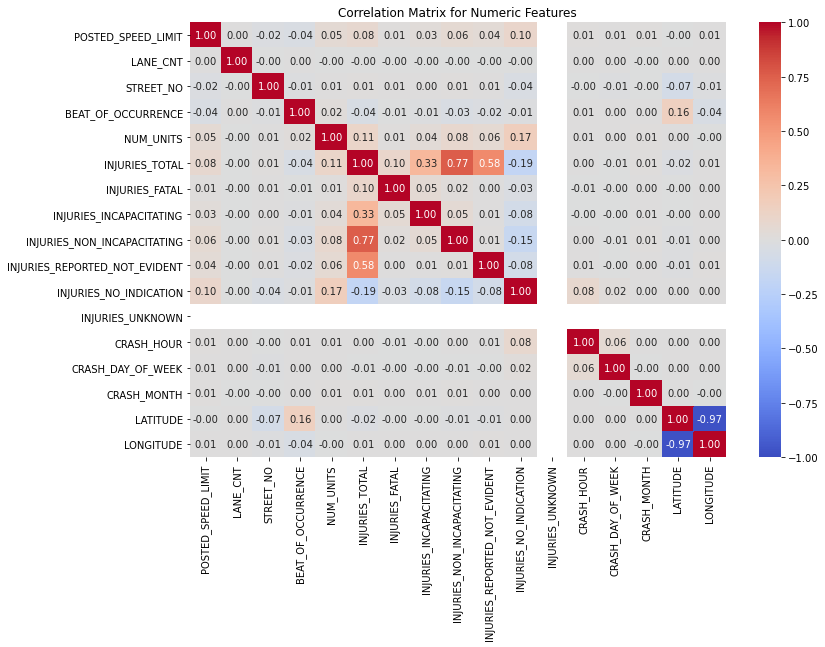

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f")
plt.title("Correlation Matrix for Numeric Features")
plt.show()

## CLEANING THE DATA

### 1. Dropping some collums

In [81]:
# dropping the CRASH_RECORD_ID 
df1 = df.drop(columns=['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE', 'SEC_CONTRIBUTORY_CAUSE', 'INJURIES_FATAL',	'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',	'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',	'MOST_SEVERE_INJURY', 'INJURIES_UNKNOWN', 'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I' ])
df1.shape

(880397, 33)

### 2. Dealing with the null values

filling using the mean

In [82]:
df1['INJURIES_TOTAL'] = df1['INJURIES_TOTAL'].fillna(df1['INJURIES_TOTAL'].mean())

using forward fill on the null values

In [83]:
columns_to_fill = ['LANE_CNT','INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I','REPORT_TYPE', 'HIT_AND_RUN_I', 'BEAT_OF_OCCURRENCE', 'LATITUDE', 'LONGITUDE', 'LOCATION'
]


df1[columns_to_fill] = df1[columns_to_fill].fillna(method='ffill')
df1.isnull().sum()

POSTED_SPEED_LIMIT              0
TRAFFIC_CONTROL_DEVICE          0
DEVICE_CONDITION                0
WEATHER_CONDITION               0
LIGHTING_CONDITION              0
FIRST_CRASH_TYPE                0
TRAFFICWAY_TYPE                 0
LANE_CNT                       17
ALIGNMENT                       0
ROADWAY_SURFACE_COND            0
ROAD_DEFECT                     0
REPORT_TYPE                     0
CRASH_TYPE                      0
INTERSECTION_RELATED_I          0
NOT_RIGHT_OF_WAY_I             39
HIT_AND_RUN_I                   2
DAMAGE                          0
DATE_POLICE_NOTIFIED            0
PRIM_CONTRIBUTORY_CAUSE         0
STREET_NO                       0
STREET_DIRECTION                4
STREET_NAME                     1
BEAT_OF_OCCURRENCE              0
WORK_ZONE_TYPE             876560
WORKERS_PRESENT_I          879120
NUM_UNITS                       0
INJURIES_TOTAL                  0
CRASH_HOUR                      0
CRASH_DAY_OF_WEEK               0
CRASH_MONTH   

using backfill on `null values

In [84]:
columns_to_fill = ['LANE_CNT','INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'LOCATION']

df1[columns_to_fill] = df1[columns_to_fill].fillna(method='bfill')
df1.isnull().sum()

POSTED_SPEED_LIMIT              0
TRAFFIC_CONTROL_DEVICE          0
DEVICE_CONDITION                0
WEATHER_CONDITION               0
LIGHTING_CONDITION              0
FIRST_CRASH_TYPE                0
TRAFFICWAY_TYPE                 0
LANE_CNT                        0
ALIGNMENT                       0
ROADWAY_SURFACE_COND            0
ROAD_DEFECT                     0
REPORT_TYPE                     0
CRASH_TYPE                      0
INTERSECTION_RELATED_I          0
NOT_RIGHT_OF_WAY_I              0
HIT_AND_RUN_I                   0
DAMAGE                          0
DATE_POLICE_NOTIFIED            0
PRIM_CONTRIBUTORY_CAUSE         0
STREET_NO                       0
STREET_DIRECTION                4
STREET_NAME                     1
BEAT_OF_OCCURRENCE              0
WORK_ZONE_TYPE             876560
WORKERS_PRESENT_I          879120
NUM_UNITS                       0
INJURIES_TOTAL                  0
CRASH_HOUR                      0
CRASH_DAY_OF_WEEK               0
CRASH_MONTH   

In [85]:
df1.dropna()
df1.shape

(880397, 33)

In [86]:
df1.dtypes

POSTED_SPEED_LIMIT           int64
TRAFFIC_CONTROL_DEVICE      object
DEVICE_CONDITION            object
WEATHER_CONDITION           object
LIGHTING_CONDITION          object
FIRST_CRASH_TYPE            object
TRAFFICWAY_TYPE             object
LANE_CNT                   float64
ALIGNMENT                   object
ROADWAY_SURFACE_COND        object
ROAD_DEFECT                 object
REPORT_TYPE                 object
CRASH_TYPE                  object
INTERSECTION_RELATED_I      object
NOT_RIGHT_OF_WAY_I          object
HIT_AND_RUN_I               object
DAMAGE                      object
DATE_POLICE_NOTIFIED        object
PRIM_CONTRIBUTORY_CAUSE     object
STREET_NO                    int64
STREET_DIRECTION            object
STREET_NAME                 object
BEAT_OF_OCCURRENCE         float64
WORK_ZONE_TYPE              object
WORKERS_PRESENT_I           object
NUM_UNITS                    int64
INJURIES_TOTAL             float64
CRASH_HOUR                   int64
CRASH_DAY_OF_WEEK   

### Using label encoder

In [87]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE',	'DEVICE_CONDITION',	'LIGHTING_CONDITION',	'FIRST_CRASH_TYPE',	'TRAFFICWAY_TYPE',	'LANE_CNT',	'ALIGNMENT',	'ROADWAY_SURFACE_COND',	'ROAD_DEFECT',	'CRASH_TYPE',	'INTERSECTION_RELATED_I','WEATHER_CONDITION', 'NOT_RIGHT_OF_WAY_I',	'HIT_AND_RUN_I', 'PRIM_CONTRIBUTORY_CAUSE',	'DAMAGE',	'BEAT_OF_OCCURRENCE',	'NUM_UNITS', 'REPORT_TYPE', 'WORK_ZONE_TYPE','DATE_POLICE_NOTIFIED', 'WORKERS_PRESENT_I','LATITUDE',	'LONGITUDE', 'CRASH_HOUR',	'CRASH_DAY_OF_WEEK',	'CRASH_MONTH', 'STREET_NO', 'STREET_DIRECTION', 'STREET_NAME', 'LOCATION'
]

for col in categorical_cols:
    df1[col] = df1[col].astype(str)


label_encoders = {col: LabelEncoder().fit(df1[col]) for col in categorical_cols}


for col in categorical_cols:
    df1[col] = label_encoders[col].transform(df1[col])

The label encoder Converts categorical variables to numeric values for simpler analysis

In [88]:
df1.dtypes

POSTED_SPEED_LIMIT           int32
TRAFFIC_CONTROL_DEVICE       int32
DEVICE_CONDITION             int32
WEATHER_CONDITION            int32
LIGHTING_CONDITION           int32
FIRST_CRASH_TYPE             int32
TRAFFICWAY_TYPE              int32
LANE_CNT                     int32
ALIGNMENT                    int32
ROADWAY_SURFACE_COND         int32
ROAD_DEFECT                  int32
REPORT_TYPE                  int32
CRASH_TYPE                   int32
INTERSECTION_RELATED_I       int32
NOT_RIGHT_OF_WAY_I           int32
HIT_AND_RUN_I                int32
DAMAGE                       int32
DATE_POLICE_NOTIFIED         int32
PRIM_CONTRIBUTORY_CAUSE      int32
STREET_NO                    int32
STREET_DIRECTION             int32
STREET_NAME                  int32
BEAT_OF_OCCURRENCE           int32
WORK_ZONE_TYPE               int32
WORKERS_PRESENT_I            int32
NUM_UNITS                    int32
INJURIES_TOTAL             float64
CRASH_HOUR                   int32
CRASH_DAY_OF_WEEK   

### Mapping the target and converting the float data 

In [89]:
df1['INJURIES_TOTAL'] = df1['INJURIES_TOTAL'].astype(int)
df1['INJURIES_TOTAL'] = df1['INJURIES_TOTAL'].apply(lambda x: 0 if x == 0  else 1)

df1.head()

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,...,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,INJURIES_TOTAL,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,18,16,1,2,4,0,5,13,3,0,...,4,2,9,1,11,2,11,314593,314556,127349
1,34,4,3,2,1,10,3,13,3,0,...,4,2,9,0,10,5,11,314593,314556,127349
2,18,16,1,2,3,7,2,13,3,0,...,4,2,11,0,6,6,9,135814,127246,127349
3,18,4,3,2,1,15,8,13,3,0,...,4,2,9,0,16,3,10,135814,127246,127349
4,6,6,1,2,3,10,11,13,3,0,...,4,2,9,1,4,5,10,135814,127246,127349


### Splitting the data

In [90]:
X = df1.drop("INJURIES_TOTAL", axis =1)
y = df1["INJURIES_TOTAL"]

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### using pipelines to fit pca

In [92]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
])

X_train_pca = pipeline.fit_transform(X_train)
X_test_pca = pipeline.transform(X_test)

X_train_pca.shape

(704317, 2)

Text(0, 0.5, 'y')

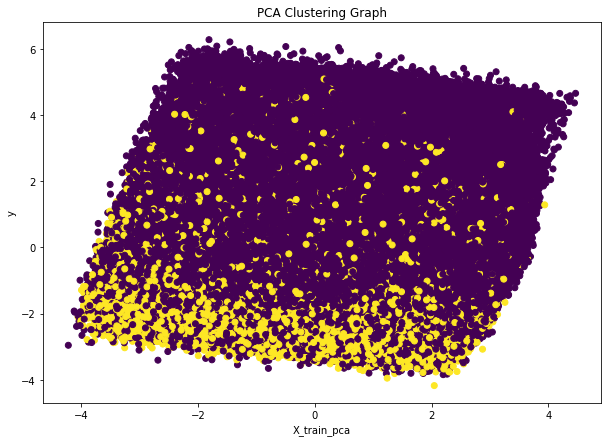

In [93]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.title('PCA Clustering Graph')
plt.xlabel('X_train_pca')
plt.ylabel('y')

## Logistic regression

Cross-Validation Accuracy: 0.859796683325761
Precision: 0.580267558528428
Recall: 0.014001533309123189
F1-score: 0.027343288286513532


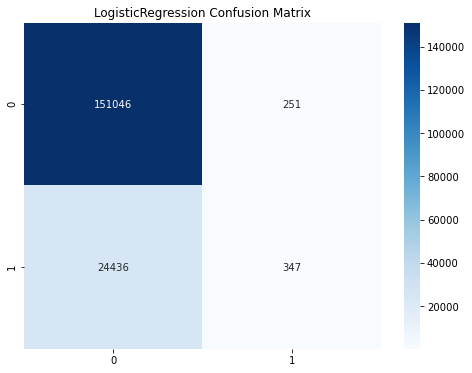

In [94]:
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix, precision_score, accuracy_score, f1_score, recall_score


logreg = LogisticRegression()
logreg.fit(X_train_pca, y_train)
y_pred_logreg = logreg.predict(X_test_pca)


accuracy_rf = accuracy_score(y_test, y_pred_logreg)
precision_rf = precision_score(y_test, y_pred_logreg)
recall_rf = recall_score(y_test, y_pred_logreg)
f1_rf = f1_score(y_test, y_pred_logreg)

# Print the evaluation metrics
print("Cross-Validation Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)

cm = confusion_matrix(y_test, y_pred_logreg)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("LogisticRegression Confusion Matrix")

plt.show()

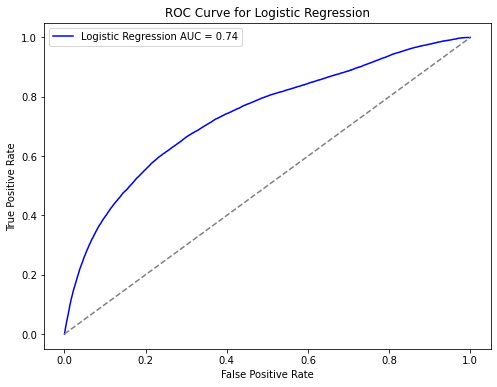

In [95]:
y_prob_logreg = logreg.predict_proba(X_test_pca)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_logreg, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Logistic Regression AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.show()

### K-Nearest Neighbors with GridSearchCV for hyperparameter tuning


Best Hyperparameters for KNN: {'n_neighbors': 7}
Cross-Validation Accuracy: 0.8512664697864607
Precision: 0.418728323699422
Recall: 0.14614856958398903
F1-score: 0.21667215027069067


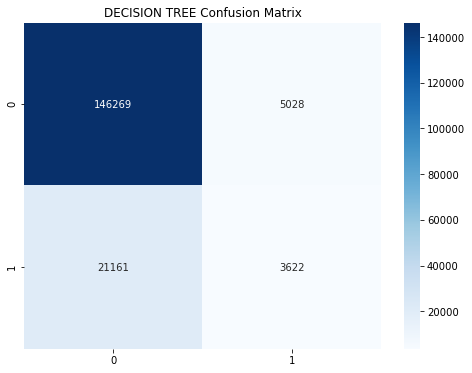

In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree



knn = KNeighborsClassifier()
param_grid_knn = {'n_neighbors': [3, 5, 7]}
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5)
grid_search_knn.fit(X_train_pca, y_train)
print("\nBest Hyperparameters for KNN:", grid_search_knn.best_params_)
y_pred_knn = grid_search_knn.predict(X_test_pca)


accuracy_rf = accuracy_score(y_test, y_pred_knn)
precision_rf = precision_score(y_test, y_pred_knn)
recall_rf = recall_score(y_test, y_pred_knn)
f1_rf = f1_score(y_test, y_pred_knn)

# Print the evaluation metrics
print("Cross-Validation Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)




cm2 = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap="Blues")
plt.title("DECISION TREE Confusion Matrix")

plt.show()

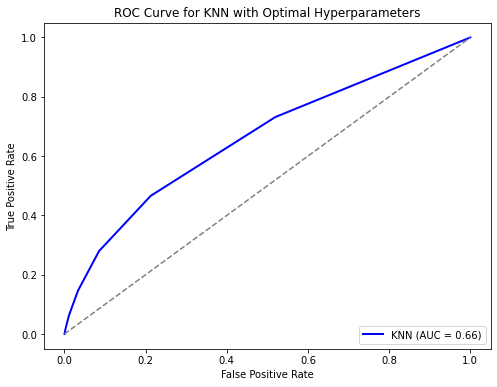

In [97]:
y_prob_knn = grid_search_knn.predict_proba(X_test_pca)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob_knn, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'KNN (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN with Optimal Hyperparameters')
plt.legend(loc="lower right")
plt.show()

## Decision Tree with GridSearchCV for hyperparameter tuning


Best Hyperparameters for Decision Tree: {'max_depth': 5, 'min_samples_split': 2}
Cross-Validation Accuracy: 0.8601658337119491
Precision: 0.5230592953308507
Recall: 0.07367953839325345
F1-score: 0.129164603522671


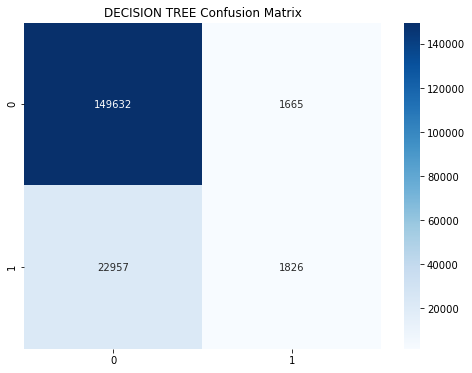

In [98]:
dt = DecisionTreeClassifier(random_state=42)
param_grid_dt = {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]}
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5)
grid_search_dt.fit(X_train_pca, y_train)
print("\nBest Hyperparameters for Decision Tree:", grid_search_dt.best_params_)
y_pred_dt = grid_search_dt.predict(X_test_pca)


accuracy_rf = accuracy_score(y_test, y_pred_dt)
precision_rf = precision_score(y_test, y_pred_dt)
recall_rf = recall_score(y_test, y_pred_dt)
f1_rf = f1_score(y_test, y_pred_dt)

# Print the evaluation metrics
print("Cross-Validation Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)


cm3 = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(cm3, annot=True, fmt='d', cmap="Blues")
plt.title("DECISION TREE Confusion Matrix")

plt.show()

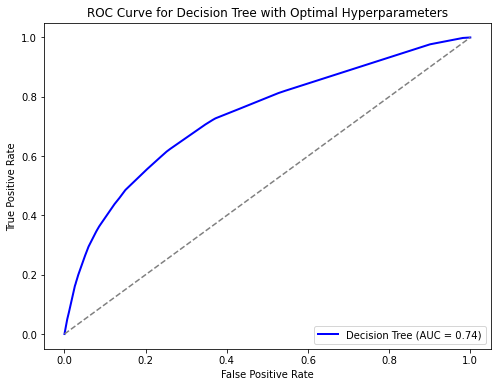

In [99]:
y_prob_dtree = grid_search_dt.predict_proba(X_test_pca)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob_dtree, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Decision Tree (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree with Optimal Hyperparameters')
plt.legend(loc="lower right")
plt.show()

## Bagging with Decision Tree

Cross-Validation Accuracy: 0.8608927760109041
Precision: 0.5234008097165992
Recall: 0.13041197595125692
F1-score: 0.20879901802442016


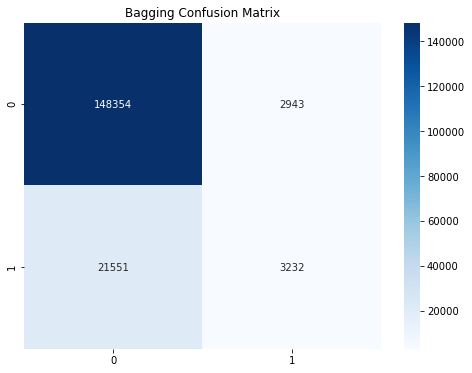

In [100]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(base_estimator=grid_search_dt.best_estimator_, n_estimators=10, random_state=42)
bagging.fit(X_train_pca, y_train)
y_pred_bagging = bagging.predict(X_test_pca)
#print("Bagging Classifier with Decision Tree Classification Report:")
# print(classification_report(y_test, y_pred_bagging))

accuracy_rf = accuracy_score(y_test, y_pred_bagging)
precision_rf = precision_score(y_test, y_pred_bagging)
recall_rf = recall_score(y_test, y_pred_bagging)
f1_rf = f1_score(y_test, y_pred_bagging)

# Print the evaluation metrics
print("Cross-Validation Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)

cm3 = confusion_matrix(y_test, y_pred_bagging)

plt.figure(figsize=(8, 6))
sns.heatmap(cm3, annot=True, fmt='d', cmap="Blues")
plt.title("Bagging Confusion Matrix")

plt.show()

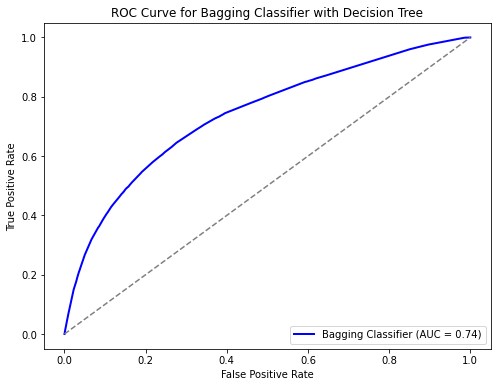

In [101]:
y_prob_bagging = bagging.predict_proba(X_test_pca)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_bagging, pos_label=1)  # Change pos_label as needed
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Bagging Classifier (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Bagging Classifier with Decision Tree')
plt.legend(loc="lower right")
plt.show()

## Random forest

Cross-Validation Accuracy: 0.8607678328032713
Precision: 0.5292827374424216
Recall: 0.09736512932251946
F1-score: 0.1644741326426283


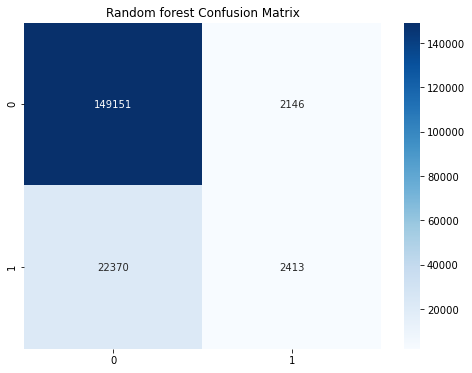

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay

rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the Random Forest model
rf.fit(X_train_pca, y_train)

# Predictions and evaluation
y_pred_rf = rf.predict(X_test_pca)
#print("Random Forest Classification Report:")
#print(classification_report(y_test, y_pred_rf))

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Print the evaluation metrics
print("Cross-Validation Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)

cm3 = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm3, annot=True, fmt='d', cmap="Blues")
plt.title("Random forest Confusion Matrix")

plt.show()

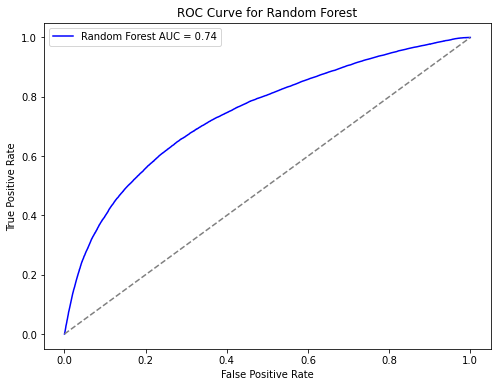

In [103]:
y_prob_rf = rf.predict_proba(X_test_pca)[:, 1]  # Assuming binary task; replace as needed
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Random Forest AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend()
plt.show()